In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
# from google.colab import files

In [10]:
# fix the random seed

np.random.seed(42)

# Prepare for the data
# Simulate the data set based on the following model:
# In this example, y = 1.0 x1 + 3*x5+2.7*x10 + e
mu, sigma = 0, 0.5 # mean and standard deviation
N = 1200 # N: number of samples
d = 800 # d: the input dim
X = np.random.normal(mu, sigma, [N, d])
eps = np.random.normal(0, 0.5, [N, 1])
beta = np.zeros([d, 1], float)
beta[np.array([1, 5, 10]),0]  =  [1.0, 3.0, 2.7]
Y = np.dot(X, beta) + eps
Y_actual = np.dot(X, beta)
print(X)
#print(beta.T)
#print(np.shape(Y))

[[ 0.24835708 -0.06913215  0.32384427 ...  0.34075035  0.01415919
   0.01487807]
 [ 0.4691419  -0.25802236  0.04806039 ...  1.02874773  0.01039685
  -0.36400147]
 [-0.09144822  0.68743821 -0.32298209 ... -0.50197869  0.10363366
   0.03467217]
 ...
 [ 0.04569438  0.37424552 -0.12820743 ... -0.37911303  0.66784089
  -0.52472939]
 [ 0.94704328  0.2116135   0.26461996 ...  0.28290149  0.16413502
   0.31588123]
 [-0.53970295 -0.05359158 -0.02710263 ... -0.05588972  0.60152995
   0.20259801]]


In [11]:
# Split the dataset into the training set and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size = 0.2)

Y_actual_train = np.dot( X_train, beta)
Y_actual_test =  np.dot(X_test, beta)

# Linear **Regression**

SparseLinearModelLS_train.png -  training set size = (960, 1)
r^2 on linreg train data : 0.991026
rmse on linreg train data : 0.189630


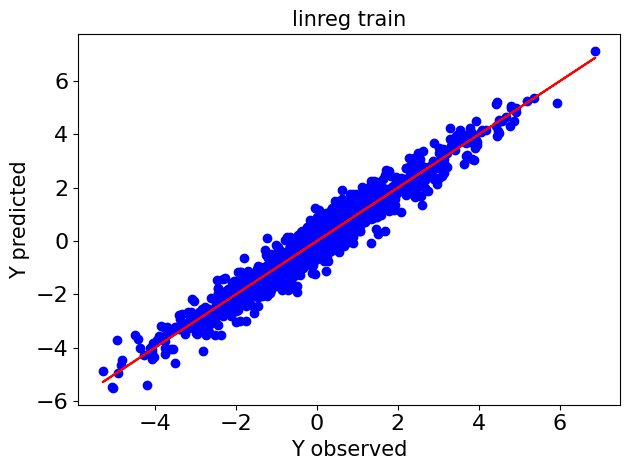

{'model': 'linreg',
 'data': 'train',
 'r2': 0.9910263146065884,
 'rmse': 0.18962967767577854}

In [12]:
from sklearn.metrics import r2_score, mean_squared_error
# Select a linear model
from sklearn import linear_model
model = sklearn.linear_model.LinearRegression()

# Train the linear model
model.fit(X_train, Y_train)

###############

def display_predictions(model, X_, Y_actual_, Y_, m_name, m_data, fname='SparseLinearModelLS.png'):
  title = f"{m_name} {m_data}"
  Y_pred = model.predict(X_)
  plt.scatter(Y_actual_, Y_pred, color='b')
  plt.plot(Y_actual_, Y_actual_, color='r')
  plt.title(title, fontsize=15)
  plt.xlabel('Y observed', fontsize=15)
  plt.ylabel('Y predicted', fontsize=15)
  plt.xticks(fontsize=16)
  plt.yticks(fontsize=16)
  plt.tight_layout()
  # plt.savefig(fname)
  # files.download(fname)
  print(f"{fname} -  training set size = {np.shape(Y_train)}")
  print("r^2 on " + title + " data : %f" % r2_score(Y_, Y_pred))
  print("rmse on " + title + " data : %f" % np.sqrt(mean_squared_error(Y_, Y_pred)))
  plt.show()
  return {'model':m_name, 'data':m_data, 'r2':r2_score(Y_, Y_pred), 'rmse':np.sqrt(mean_squared_error(Y_, Y_pred))}

linreg_train = display_predictions(model, X_train, Y_actual_train, Y_train, "linreg","train", 'SparseLinearModelLS_train.png')
linreg_train

SparseLinearModelLS_test.png -  training set size = (960, 1)
r^2 on linreg test data : 0.656088
rmse on linreg test data : 1.261403


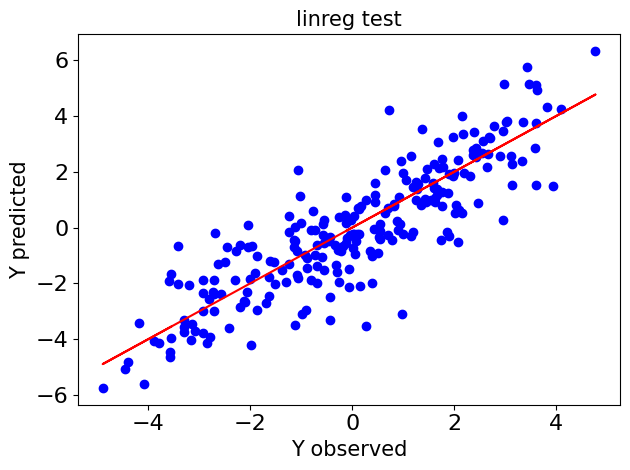

In [13]:
linreg_test = display_predictions(model, X_test, Y_actual_test, Y_test, "linreg", "test",'SparseLinearModelLS_test.png')

# **Lasso Regression**

SparseLinearModelLasso_train.png -  training set size = (960,)
r^2 on lasso train data : 0.942700
rmse on lasso train data : 0.479178


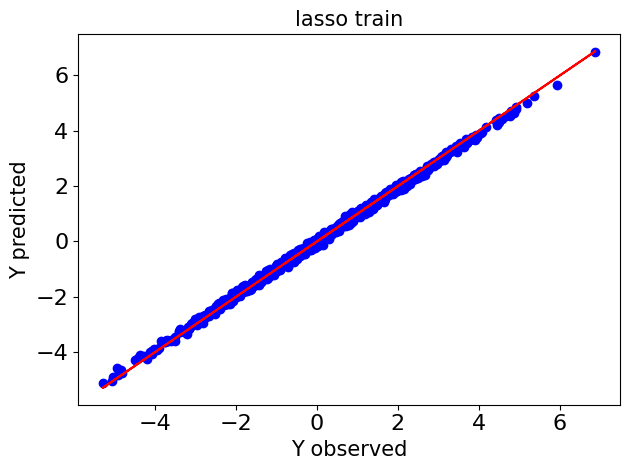

In [24]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.feature_selection import SelectFromModel

Y_train = Y_train.ravel()
lassocv = LassoCV(cv=20).fit(X_train, Y_train)
lasso_train = display_predictions(lassocv, X_train, Y_actual_train, Y_train, "lasso", "train", 'SparseLinearModelLasso_train.png')
# Y_test_pred_Lasso = lassocv.predict(X_test)
# plt.scatter(Y_actual_test, Y_test_pred_Lasso, color='b')
# plt.plot(Y_actual_test, Y_actual_test, color='r')
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
# plt.tight_layout()
# plt.savefig('SparseLinearModelLasso.png')
# files.download('SparseLinearModelLasso.png')
# r2_score_lasso = r2_score(Y_test, Y_test_pred_Lasso)

# print("r^2 on test data : %f" % r2_score_lasso)
# print("rmse on test data : %f" % np.sqrt(mean_squared_error(Y_test, Y_test_pred_Lasso)))


SparseLinearModelLasso_test.png -  training set size = (960, 1)
r^2 on lasso test data : 0.946101
rmse on lasso test data : 0.499367


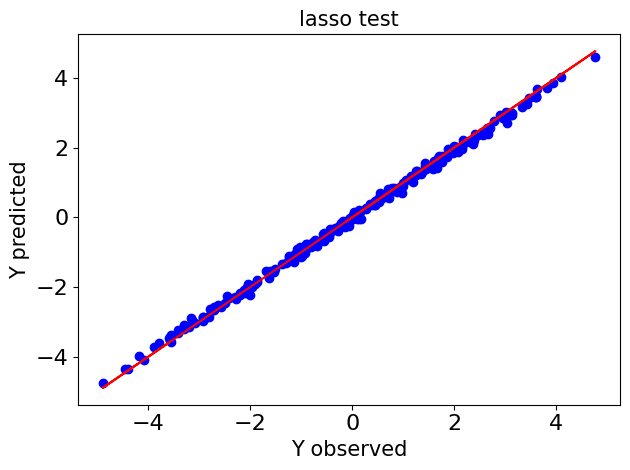

In [15]:
lasso_test = display_predictions(lassocv, X_test, Y_actual_test, Y_test, "lasso", "test", 'SparseLinearModelLasso_test.png')

0.015597830979571946
(800,)
(array([  1,   5,  10,  31,  43,  68, 114, 131, 134, 156, 164, 185, 209,
       226, 243, 258, 263, 265, 276, 302, 336, 356, 368, 395, 396, 426,
       434, 440, 452, 453, 457, 481, 519, 560, 585, 596, 627, 646, 655,
       663, 770, 792], dtype=int64),)


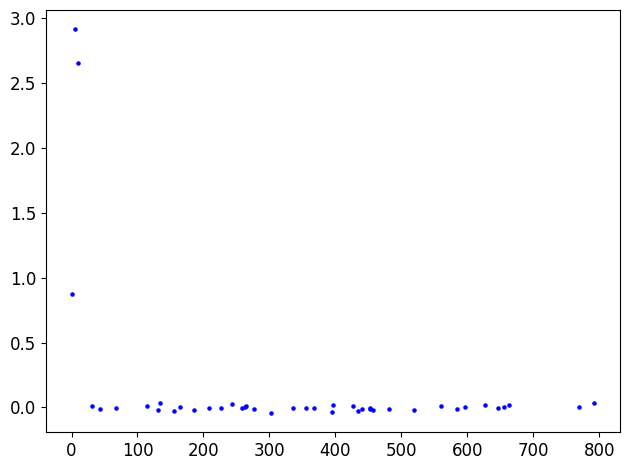

In [16]:
## Print the fitting results
print(lassocv.alpha_)
coef = lassocv.coef_
print(np.shape(coef))
non_zero_coef_index = np.where(np.abs(coef)> 0)
print(non_zero_coef_index)
plt.scatter(non_zero_coef_index, coef[non_zero_coef_index], color='b', s=5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
# plt.savefig('Lasso.png')
# files.download('Lasso.png')


# **Ridge Regression**

SparseLinearModelRidge_train.png -  training set size = (960, 1)
r^2 on ridge train data : 0.984223
rmse on ridge train data : 0.251436


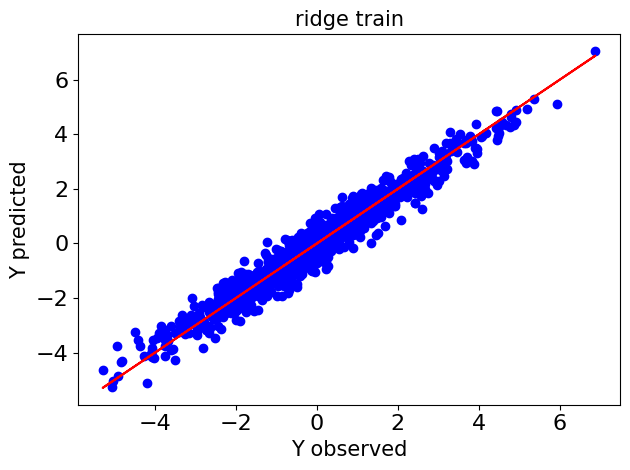

In [17]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV().fit(X_train, Y_train)

Y_test_pred_Ridge = ridgecv.predict(X_test)

ridge_train = display_predictions(ridgecv, X_train, Y_actual_train, Y_train, "ridge", "train", 'SparseLinearModelRidge_train.png')

# plt.scatter(Y_actual_test, Y_test_pred_Ridge, color='b')
# plt.plot(Y_actual_test, Y_actual_test, color ='r')
# r2_score_lasso = r2_score(Y_test, Y_test_pred_Ridge)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
# plt.tight_layout()
# plt.savefig('SparseLinearModelRidge.png')
# files.download('SparseLinearModelRidge.png')
# print("r^2 on test data : %f" % r2_score_lasso)
# print("rmse on test data : %f" % np.sqrt(mean_squared_error(Y_test, Y_test_pred_Ridge)))

SparseLinearModelRidge_test.png -  training set size = (960, 1)
r^2 on ridge test data : 0.819723
rmse on ridge test data : 0.913273


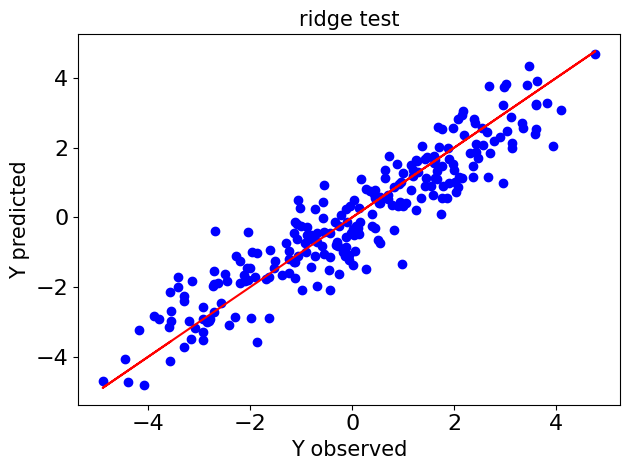

In [18]:
ridge_test = display_predictions(ridgecv, X_test, Y_actual_test, Y_test, "ridge", "test", 'SparseLinearModelRidge_test.png')

10.0
(1, 800)


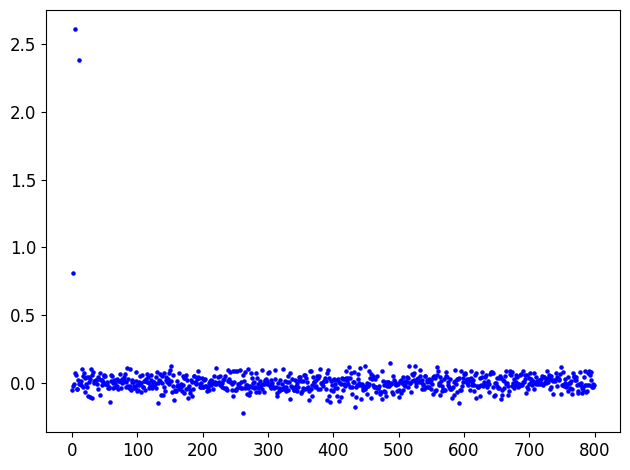

In [19]:
print(ridgecv.alpha_)
coef = ridgecv.coef_
print(np.shape(coef))
plt.scatter(np.arange(np.shape(coef)[1]), coef.T, color='b', s=5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
# plt.savefig('Ridge.png')
# files.download('Ridge.png')

In [20]:
import pandas as pd

stats = pd.DataFrame([linreg_train,linreg_test, lasso_train, lasso_test, ridge_train, ridge_test])
stats_table = stats.pivot(index='model', columns='data', values=['r2','rmse'])
display(stats_table)


r2                rmse          
data        test     train      test     train
model                                         
lasso   0.946101  0.942700  0.499367  0.479178
linreg  0.656088  0.991026  1.261403  0.189630
ridge   0.819723  0.984223  0.913273  0.251436

# Ridge Regression coefficients

(2, 800)


,0.5,10.0
0,-0.089606,-0.052151
1,0.957701,0.808238
2,0.000115,-0.022029
3,-0.007050,-0.005802
4,0.078762,0.072571
5,2.978883,2.607514


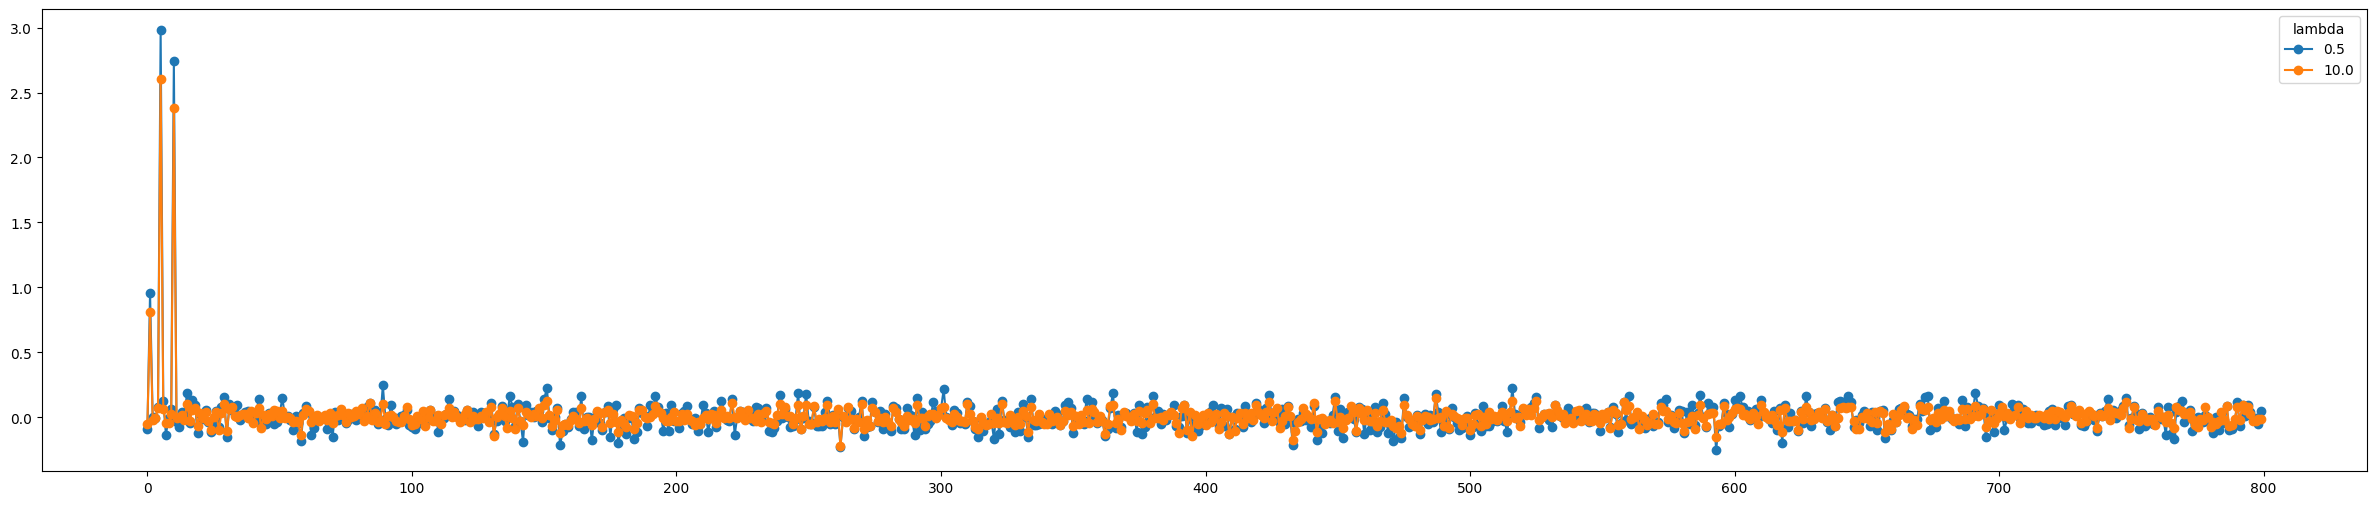

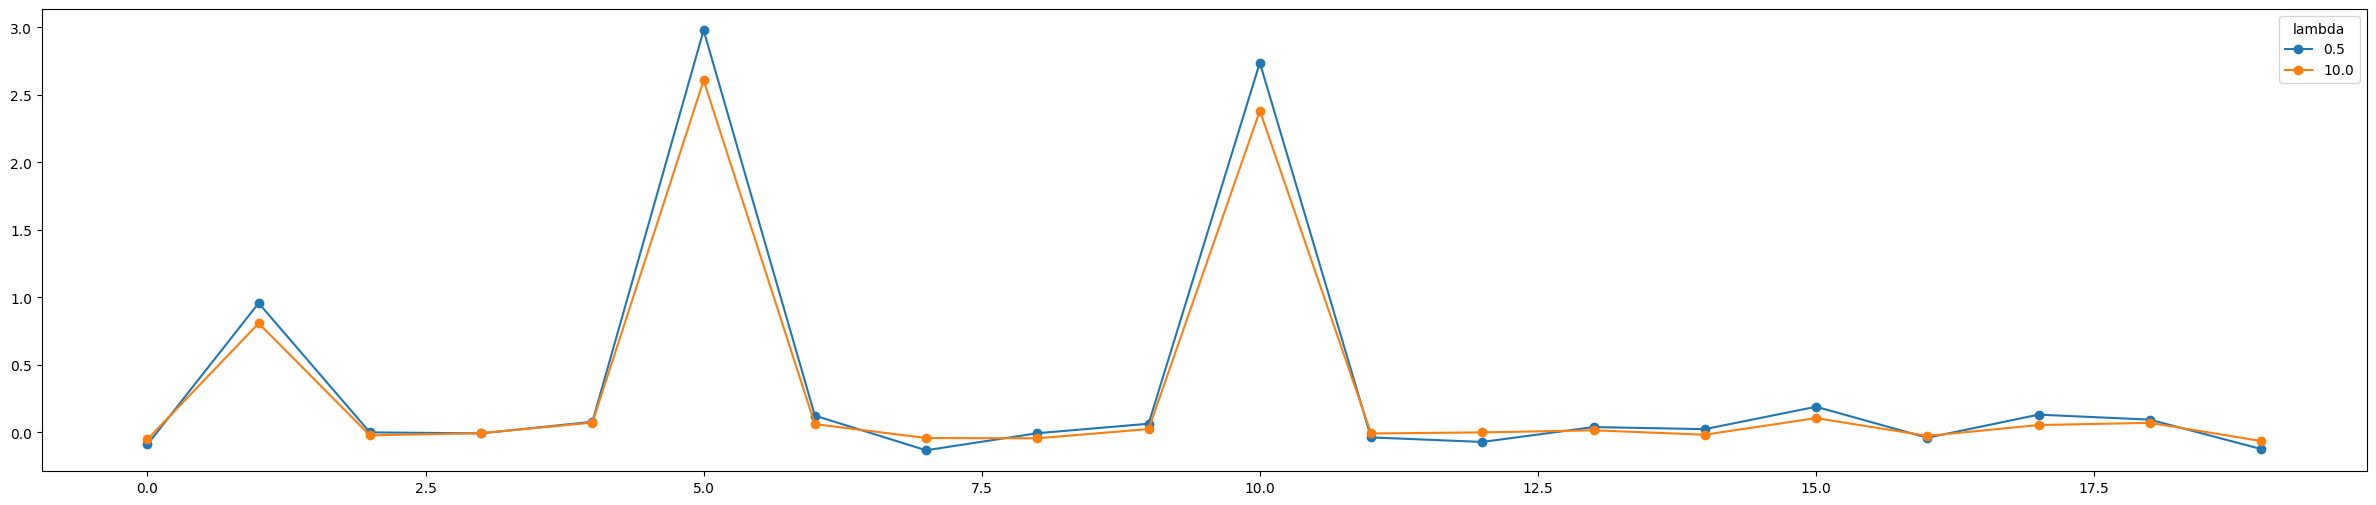

In [23]:
##################
from sklearn.linear_model import RidgeCV
import pandas as pd

# alpha_list = [.00001,.0001,.001,.01,.1,.2,.5,1.0,5.0,10.0, 20.] #np.arange(0.1,5.,0.1,dtype=float)
alpha_list = [0.5, 10.0]
coefs = []
for ridgecv_alphas in alpha_list:
  ridgecv = RidgeCV(ridgecv_alphas).fit(X_train, Y_train)
  coefs.append(ridgecv.coef_[0])

print(np.shape(coefs))
coefs_df = pd.DataFrame(coefs, index=alpha_list).transpose()

display(coefs_df.iloc[:6,:12])

plt.figure(figsize=(30,6))
plt.plot(coefs_df, 'o-')
plt.legend(coefs_df.columns, title='lambda')
plt.show()

plt.figure(figsize=(30,6))
plt.plot(coefs_df[:20], 'o-')
plt.legend(coefs_df.columns, title='lambda')
plt.show()

,0.00001,0.00010,0.00100,0.01000,0.10000,0.20000,0.50000,1.00000,5.00000,10.00000,20.00000
mean,0.008820,0.008820,0.008820,0.008822,0.008835,0.008850,0.008887,0.008931,0.008834,0.008393,0.007522
std,0.171393,0.171392,0.171380,0.171258,0.170098,0.168915,0.165885,0.161997,0.146942,0.137724,0.126342
skew,12.242103,12.242275,12.243996,12.261123,12.423954,12.588567,13.000222,13.496610,14.819224,15.078532,14.960559
kurt,203.381335,203.385193,203.423752,203.807454,207.464830,211.179563,220.545739,231.987627,263.369918,269.843933,267.361357


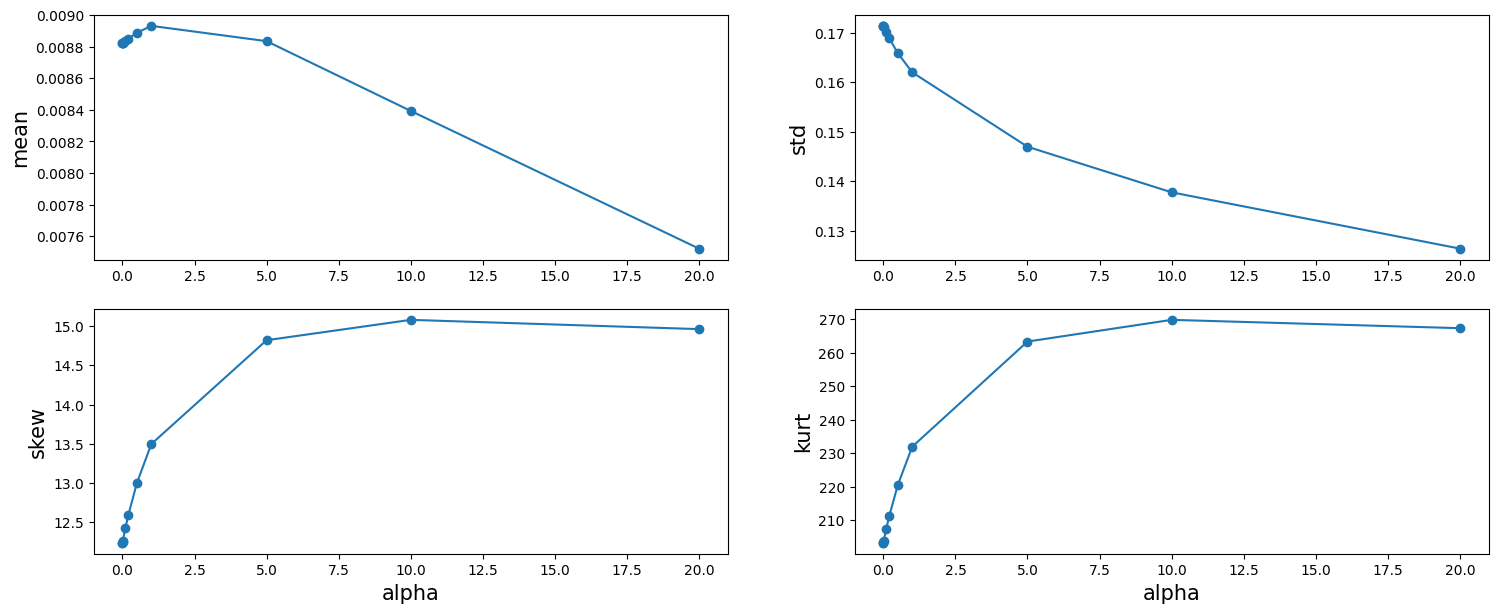

In [22]:
c_stats = coefs_df.agg(['mean','std','skew','kurt'])
display(c_stats)

plt.figure(figsize=(18,7))
plt.subplot(221)
plt.plot(c_stats.transpose()['mean'], 'o-')
plt.ylabel("mean", fontsize=15)
plt.subplot(222)
plt.plot(c_stats.transpose()['std'], 'o-')
plt.ylabel('std', fontsize=15)
plt.subplot(223)
plt.plot(c_stats.transpose()['skew'], 'o-')
plt.ylabel('skew', fontsize=15)
plt.xlabel('alpha', fontsize=15)
plt.subplot(224)
plt.plot(c_stats.transpose()['kurt'], 'o-')
plt.ylabel('kurt', fontsize=15)
plt.xlabel('alpha', fontsize=15)
plt.show()

# Elastic **Net**

alpha is  0.02359837425088335
l1 is  0.5
ElasticNet_train.png -  training set size = (960,)
r^2 on elastic net train data : 0.944385
rmse on elastic net train data : 0.472082


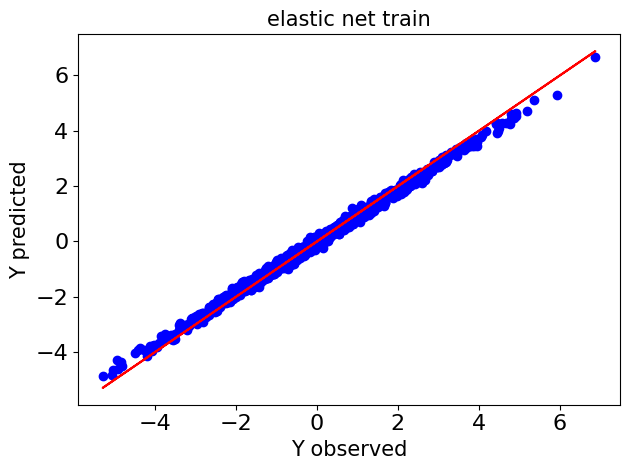

In [29]:
from sklearn.linear_model import ElasticNetCV

elasticnet = ElasticNetCV(cv=5, random_state=0)
elasticnet.fit(X_train, Y_train)
print("alpha is ", elasticnet.alpha_)
print("l1 is ", elasticnet.l1_ratio_)
elasticnet_train = display_predictions(elasticnet, X_train, Y_actual_train, Y_train, "elastic net", "train", 'ElasticNet_train.png')

Elastic_test.png -  training set size = (960,)
r^2 on elastic net test data : 0.937332
rmse on elastic net test data : 0.538460


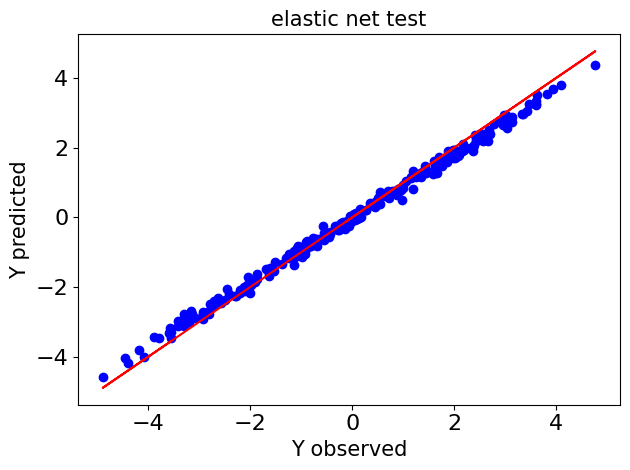

In [30]:
elsticnet_test = display_predictions(elasticnet, X_test, Y_actual_test, Y_test, "elastic net", "test", 'Elastic_test.png')